# PyTorch x Neural Networks


In the real world, while fundamentals are welcomed and appreciated, implementing algorithms from scratch is time consuming, especially when it comes to Deep Learning (DL) models like neural networks with many layers. Backpropagating manually or by hand is often tedious and erroneous. Which is why, knowing **at least one** Machine Learning library is very very necessary, either to get jobs or build projects in this field. As such, in this project, I wish to explore**PyTorch**.

In [ ]:
# RUN THIS CELL FIRST

import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# 1 Tensors in PyTorch

### 1.1 Concept - What are Tensors?

In Linear Algebra, vectors are 1-dimensional (1D) serial arrays (like `[1, 2, 3, 4, 23, 18]`) containing a column (or row) of information. Matrices are "rectangles" (i.e., 2D) that also capture elements.

**Tensors** generalise the concept of matrices: they are $n$-dimensional arrays that contain or represent information. In *PyTorch*, everything is defined as a `tensor`. It's analogous to `np.array(...)` from *NumPy*. A `tensor` object in *PyTorch* looks like this:

<img src="imgs/img_tensors.png" width="600">

Notice that tensors have a `.grad` attribute. This is used for automatic gradient computation.  
To create tensors, we use the `torch.tensor(...)` constructor:  

A 0-dimensional tensor: `torch.tensor(5.0)`  
A 1-dimensional tensor: `torch.tensor([1.0, 2.0, 3.0])`  
A 2-dimensional tensor: `torch.tensor([[.4, .3], [.1, .2]])`  

If automatic gradient computation is required, then the equivalent constructors will be:  
`torch.tensor(5.0, requires_grad=True)`  
`torch.tensor([1.0, 2.0, 3.0], requires_grad=True)`  
`torch.tensor([[.4, .3], [.1, .2]], requires_grad=True)`  

**Tensors**, like *NumPy* arrays, can have arbitrary number of dimensions, and we can easily create $n$-dimensional tensors.

### 1.2 Demo - Working with Tensors

Here, we use `torch.linspace` to create a `torch.tensor`. In PyTorch, and Machine Learning in general, tensors form the basis of all operations.

We then make use of the built-in *PyTorch* function `torch.sin` to create the corresponding y-values of a sine function, and plot the points using *Matplotlib*.

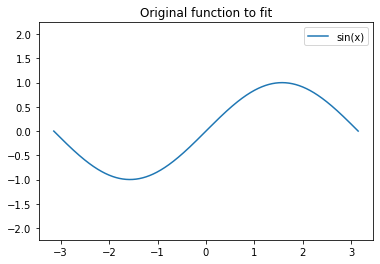

In [ ]:
import math

import matplotlib.pyplot as plt
import torch
import torch.nn as nn

x = torch.linspace(-math.pi, math.pi, 1000)
y_true = torch.sin(x)

plt.plot(x, y_true, linestyle='solid', label='sin(x)')
plt.axis('equal')
plt.title('Original function to fit')
plt.legend()
plt.show()

In [ ]:
# Run this cell to explore what the FIRST 10 VALUES of x has been assigned to.
x[:10]

tensor([-3.1416, -3.1353, -3.1290, -3.1227, -3.1164, -3.1101, -3.1039, -3.0976,
        -3.0913, -3.0850])

### Using Tensors for linear regression

For this example, we fit a **degree 3 polynomial** to the sine function, using a learning rate of 1e-6 and 5000 iterations.

iter	loss	
----	----
1000	0.4506033957004547
2000	0.4224050045013428
3000	0.40602096915245056
4000	0.396359920501709
5000	0.39052513241767883


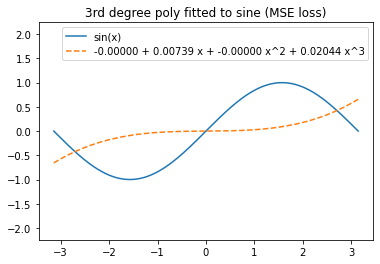

In [ ]:
# Set learning rate
learning_rate = 1e-6

# Initialize weights to 0
a = torch.tensor(0.)
b = torch.tensor(0.)
c = torch.tensor(0.)
d = torch.tensor(0.)

print('iter', 'loss', '\n----', '----', sep='\t')
for t in range(1, 5001): # 5000 iterations
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x**2 + d * x**3

    # Compute MSE loss
    loss = torch.mean(torch.square(y_pred - y_true))
    if t % 1000 == 0:
        print(t, loss.item(), sep='\t')

    # Backprop
    grad_y_pred = 2.0 * (y_pred - y_true) / y_pred.shape[0]
    # Compute gradients of a, b, c, d with respect to loss
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

# print fitted polynomial
equation = f'{a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3'

y_pred = a + b * x + c * x**2 + d * x**3
plt.plot(x, y_true, linestyle='solid', label='sin(x)')
plt.plot(x, y_pred, linestyle='dashed', label=f'{equation}')
plt.axis('equal')
plt.title('3rd degree poly fitted to sine (MSE loss)')
plt.legend()
plt.show()

### 1.5 Using autograd to automatically compute gradients

In the previous example, we explicitly computed the gradient for Mean Squared Error (MSE)  
`grad_y_pred = 2.0 * (y_pred - y_true) / y_pred.shape[0]`

In the next example, we will use PyTorch's autograd functionality to help us compute the gradient for **Mean Absolute Error (MAE)**.  
In order to compute the gradients, we will use the `.backward()` method of *PyTorch* tensors.

Once again, we fit a **degree 3 polynomial** to the sine function, using a learning rate of `1e-6` and `5000` iterations.  
This time, we will use MAE instead of MSE.

iter	loss	
----	----
1000	0.5974264740943909
2000	0.5801821351051331
3000	0.5707745552062988
4000	0.565079927444458
5000	0.5613779425621033


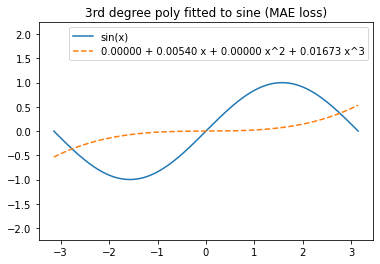

In [ ]:
# This is a demonstration: You just need to run this cell without editing.

# Set learning rate
learning_rate = 1e-6

# Initialize weights to 0
a = torch.tensor(0., requires_grad=True)
b = torch.tensor(0., requires_grad=True)
c = torch.tensor(0., requires_grad=True)
d = torch.tensor(0., requires_grad=True)

print('iter', 'loss', '\n----', '----', sep='\t')
for t in range(1, 5001):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute MAE loss
    loss = torch.mean(torch.abs(y_pred - y_true))
    if t % 1000 == 0:
        print(t, loss.item(), sep='\t')

    # Automatically compute gradients
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        a.grad.zero_() # reset gradients !important
        b.grad.zero_() # reset gradients !important
        c.grad.zero_() # reset gradients !important
        d.grad.zero_() # reset gradients !important
        # What happens if you don't reset the gradients?

# print fitted polynomial
equation = f'{a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3'

y_pred = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x, y_true, linestyle='solid', label='sin(x)')
plt.plot(x, y_pred.detach().numpy(), linestyle='dashed', label=f'{equation}')
plt.axis('equal')
plt.title('3rd degree poly fitted to sine (MAE loss)')
plt.legend()
plt.show()

### 1.6 Polyfit model

We have demonstrated how to fit a degree-3 polynomial to a set of `x` and `y` points (following the sine curve), using two different types of loss functions (MSE and MAE).  

Here, we write a function `polyfit` that takes in some arbitrary set of points, 
1. `x`, corresponding x-values,  
2. `y`, corresponding true y-values,  
3. `loss_fn` to compute the loss, given the true `y` and predicted `y`,  
4. `n` representing the $n$-degree polynomial, and 
5. `lr` learning rate, and  
6. `n_iter` for the number of times to iterate.  

Return the 1D tensor containing the coefficients of the $n$-degree polynomial , after fitting the model.  
The coefficients should be arranged in ascending powers of $x$.

For example,
```
>>> y = torch.sine(x)
>>> mse = lambda y_true, y_pred: torch.mean(torch.square(y_pred - y_true))
>>> mae = lambda y_true, y_pred: torch.mean(torch.abs(y_pred - y_true))

>>> polyfit(x, y, mse, 3, 1e-3, 5000)
tensor([-4.2270e-09,  8.5167e-01,  1.2131e-08, -9.2587e-02], requires_grad=True))

>>> polyfit(x, y, mae, 3, 1e-3, 5000)
tensor([-9.6776e-07,  8.7905e-01, -2.4784e-06, -9.8377e-02], requires_grad=True))
```

*Note: For this regression problem, weights are initializedto 0.0.*

### 1.7 Observations on different model configurations

Obeservations after running `polyfit` on these model configurations.

1. `polyfit(x, y, mse, 3, 1e-6, 5000)`
2. `polyfit(x, y, mse, 3, 1e6, 5000)`
3. `polyfit(x, y, mse, 1, 1e-3, 5000)`
4. `polyfit(x, y, mse, 6, 1e-3, 5000)`

0.49949994683265686
0.45056676864624023
0.42238375544548035
0.4060085117816925
0.39635246992111206
0.49949994683265686
nan
nan
nan
nan
0.49949994683265686
0.19675274193286896
0.19675219058990479
0.19675219058990479
0.19675219058990479
0.49949994683265686
nan
nan
nan
nan


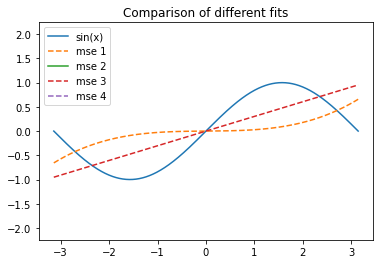

In [ ]:
def polyfit(x, y, loss_fn, n, lr, n_iter):
    """
    PARAMS:
        x : original 1-D x-values
        y : corresponding 1-D y-values
        loss_fn : function to measure loss
        n : nth-degree polynomial
        lr : learning rate
        n_iter : the number of iterations of gradient descent
        
    RETURNS:
        The near-optimal coefficients of the
        nth-degree polynomial after `n_iter` epochs
    """
    powers = torch.tensor([i for i in range(n+1)])
    x = torch.unsqueeze(x, -1)
    x = torch.pow(x, powers)
    weights = torch.zeros(n + 1, requires_grad = True)

    for t in range(n_iter):
      y_pred = torch.matmul(weights, x.T)
      loss = loss_fn(y, y_pred)
      loss.backward()

      if t % 1000 == 0:
        print(loss.item())

      with torch.no_grad():
        weights -= lr * weights.grad
        weights.grad.zero_()

    return weights



x = torch.linspace(-math.pi, math.pi, 1000)

# Original true values
y = torch.sin(x)
plt.plot(x, y, linestyle='solid', label='sin(x)')

mse = lambda y_true, y_pred: torch.mean(torch.square(y_pred - y_true))


# MSE 1
a, b, c, d = polyfit(x, y, mse, 3, 1e-6, 5000)
y_pred_mse1 = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x, y_pred_mse1.detach().numpy(), linestyle='dashed', label=f'mse 1')

# MSE 2

e, f, g, h = polyfit(x, y, mse, 3, 1e6, 5000)
y_pred_mse2 = e + f * x + g * x ** 2 + h * x ** 3
plt.plot(x, y_pred_mse2.detach().numpy(), linestyle='solid', label=f'mse 2')

# MSE 3

i, j = polyfit(x, y, mse, 1, 1e-3, 5000)
y_pred_mse3 = i + j * x
plt.plot(x, y_pred_mse3.detach().numpy(), linestyle='dashed', label=f'mse 3')

# MSE 3
k, l, m, n, o, p, q = polyfit(x, y, mse, 6, 1e-3, 5000)
y_pred_mse4 = k + l * x + m * x ** 2 + n * x ** 3 + o * x ** 4 + p * x ** 5 + q * x ** 6
plt.plot(x, y_pred_mse4.detach().numpy(), linestyle='dashed', label=f'mse 4')


# MAE
#mae = lambda y_true, y_pred: torch.mean(torch.abs(y_pred - y_true))
#a, b, c, d = polyfit(x, y, mae, 3, 1e-3, 5000)
#y_pred_mae = a + b * x + c * x ** 2 + d * x ** 3
#plt.plot(x, y_pred_mae.detach().numpy(), linestyle='dashed', label=f'mae')


plt.axis('equal')
plt.title('Comparison of different fits')
plt.legend()
plt.show()

---
# 2. Computing gradients for arbitrary graphs

<img src="imgs/img_toy_nn.jpg" width="400">

### 2.1 Forward pass

Here, we implement the function `forward_pass` that takes in 4 arguments:  
1. `x`, the input values (not including bias)
2. `w0`, (2x2) weights of the hidden layer
3. `w1`, (3x1) weights of the output layer
4. `activation_fn`, the activation function of the hidden layer.

In [ ]:

x = torch.linspace(-10, 10, 1000).reshape(-1, 1)
y = torch.abs(x-1)

def forward_pass(x, w0, w1, activation_fn):
    m = x.shape[0]
    bias = torch.ones(m, 1)
    x = torch.cat((bias, x), axis = 1)
    y_pred = x @ w0
    y_pred = activation_fn(y_pred)
    y_pred = torch.cat((bias, y_pred), axis = 1)
    y_pred = y_pred @ w1
    return y_pred

# Exact weights
w0 = torch.tensor([[-1., 1.], [1., -1.]], requires_grad=True)
w1 = torch.tensor([[0.], [1.], [1.]], requires_grad=True)

# Performing a forward pass on exact solution for weights will give us the correct y values
x_sample = torch.linspace(-2, 2, 5).reshape(-1, 1)
forward_pass(x_sample, w0, w1, torch.relu) # tensor([[3.], [2.], [1.], [0.], [1.]])

tensor([[3.],
        [2.],
        [1.],
        [0.],
        [1.]], grad_fn=<MmBackward0>)

### 2.2 Backward propagation

Here , we will start with random weights for `w0` and `w1`, and iteratively perform forward passes and backward propagation multiple times to converge on a solution.

iter	loss	
----	----
1000	4.4103312492370605
2000	2.852491855621338
3000	1.732651948928833
4000	1.135270118713379
5000	0.7932249903678894
6000	0.5798095464706421
7000	0.43656226992607117
8000	0.3345654308795929
9000	0.258656769990921
10000	0.20048648118972778
--- w0 ---
tensor([[ 2.6527,  0.5764],
        [-0.3124, -1.5384]], requires_grad=True)
--- w1 ---
tensor([[ 7.0597],
        [-2.6979],
        [ 1.2358]], requires_grad=True)


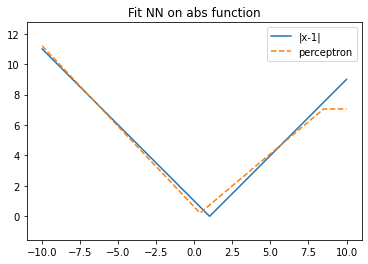

In [ ]:
torch.manual_seed(2) # Set seed to some fixed value

w0 = torch.randn(2, 2, requires_grad=True)
w1 = torch.randn(3, 1, requires_grad=True)

learning_rate = 1e-3
print('iter', 'loss', '\n----', '----', sep='\t')
for t in range(1, 10001):
    # Forward pass: compute predicted y
    y_pred = forward_pass(x, w0, w1, torch.relu)

    loss = torch.mean(torch.square(y - y_pred))
    loss.backward()

    if t % 1000 == 0:
        print(t, loss.item(), sep='\t')

    with torch.no_grad():
        # Update weights and then reset the gradients to zero
        w0 -= learning_rate * w0.grad
        w1 -= learning_rate * w1.grad
        w0.grad.zero_()
        w1.grad.zero_()

print("--- w0 ---", w0, sep='\n')
print("--- w1 ---", w1, sep='\n')
y_pred = forward_pass(x, w0, w1, torch.relu)
plt.plot(x, y, linestyle='solid', label='|x-1|')
plt.plot(x, y_pred.detach().numpy(), linestyle='dashed', label='perceptron')
plt.axis('equal')
plt.title('Fit NN on abs function')
plt.legend()
plt.show()

w0   = [[0.0, 0.0], [0.0,  0.0]] 
w1   = [[0.0], [0.0], [0.0]]     
loss = 0.0                      

# 3 Neural Networks (using PyTorch layers)


PyTorch abstracts that away using the `nn.Linear(in_dimensions, out_dimensions)` layer that does this under the hood.  
`Linear` represents a fully connected layer with bias automatically included.  
If you do not wish to include a bias column, you can simply call `nn.Linear(in_dimensions, out_dimensions, bias=False)` instead.

PyTorch has many other layers implemented for various model architectures.  
You can read more in the glossary as well as in the docs: https://pytorch.org/docs/stable/nn.html  
For now, we will only be using fully connected `Linear` layers.

In this section, we inherit from PyTorch's `nn.Module` class (remember Object-oriented Programming?) to build the model from the previous task `y = |x-1|` from the lecture.  
<img src="imgs/img_toy_nn.jpg" width="400">  

The `nn.Module` class is an interface that houses two main methods: `__init__`, where we instantiate our layers and activation functions, and `forward`, that performs the forward pass.

### 3.1 Forward pass



In [ ]:
class MyFirstNeuralNet(nn.Module):
    def __init__(self): # set the arguments you'd need
        super().__init__()
        self.l1 = nn.Linear(1, 2) # bias included by default
        self.l2 = nn.Linear(2, 1) # bias included by default
        self.relu = nn.ReLU()

    # Task 3.1: Forward pass
    def forward(self, x):
        x = self.l1(x)
        x = self.l2(x)
        x = self.relu(x)
        return x

### 3.2 Backward propagation

Epoch	Loss	
-----	----
 1000	12.283092498779297
 2000	12.214119911193848
 3000	12.188478469848633
 4000	12.180843353271484
 5000	12.178929328918457
 6000	12.178497314453125
 7000	12.178403854370117
 8000	12.178385734558105
 9000	12.17838191986084
10000	12.178380966186523


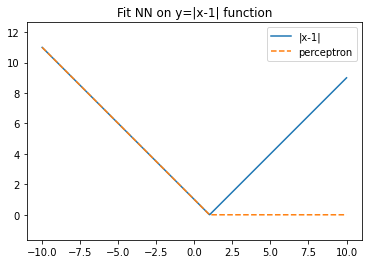

In [ ]:
epochs = 10000

model = MyFirstNeuralNet()
# the optimizer controls the learning rate
optimiser = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0)
loss_fn = nn.MSELoss()

x = torch.linspace(-10, 10, 1000).reshape(-1, 1)
y = torch.abs(x-1)

print('Epoch', 'Loss', '\n-----', '----', sep='\t')
for i in range(1, epochs+1):
    # reset gradients to 0
    optimiser.zero_grad()
    # get predictions
    y_pred = model(x)
    # compute loss
    loss = loss_fn(y_pred, y)
    # backpropagate
    loss.backward()
    # update the model weights
    optimiser.step()

    if i % 1000 == 0:
        print (f"{i:5d}", loss.item(), sep='\t')

y_pred = model(x)
plt.plot(x, y, linestyle='solid', label='|x-1|')
plt.plot(x, y_pred.detach().numpy(), linestyle='dashed', label='perceptron')
plt.axis('equal')
plt.title('Fit NN on y=|x-1| function')
plt.legend()
plt.show()

### 3.3 Save and load models

The model weights are stored within the model itself.  
We may save/load the model weights:
```
torch.save(model.state_dict(), "path/to/model_state_dict")

model = MyFirstNeuralNet()
model.load_state_dict(torch.load("path/to/model_state_dict"))
```

Alternatively, we can save/load the entire model using
```
torch.save(model, "path/to/model")

model = torch.load("path/to/model")
```

### 3.4 Task 8 - Model weights

Here, we will print out the trained model's `.state_dict()`

In [ ]:
print(model.state_dict())

--- Submit the OrderedDict below ---
OrderedDict([('l1.weight', tensor([[1.0344],
        [0.1120]])), ('l1.bias', tensor([-0.4025, -0.4025])), ('l2.weight', tensor([[-0.9055, -0.5672]])), ('l2.bias', tensor([0.4061]))])


### 3.5 Concept - Using NN to recognize handwritten digits

In the final part of this project, I will be building a neural network to classify images to their respective digits.  

I built and train a model on the classic **MNIST Handwritten Digits** dataset. Each grayscale image is a $28 \times 28$ matrix/tensor that looks like so:

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="500" />

MNIST is a classification problem and the task is to take in an input image and classify them into one of ten buckets: the digits from $0$ to $9$. 

### 3.5 Loading an external dataset

The cell below imports the MNIST dataset, which is already pre-split into train and test sets.  

The download takes approximately 63MB of space.

In [ ]:
# DO NOT REMOVE THIS CELL – THIS DOWNLOADS THE MNIST DATASET
# RUN THIS CELL BEFORE YOU RUN THE REST OF THE CELLS BELOW
from torchvision import datasets

# This downloads the MNIST datasets ~63MB
mnist_train = datasets.MNIST("./", train=True, download=True)
mnist_test  = datasets.MNIST("./", train=False, download=True)

x_train = mnist_train.data.reshape(-1, 784) / 255
y_train = mnist_train.targets
    
x_test = mnist_test.data.reshape(-1, 784) / 255
y_test = mnist_test.targets

### 3.6 Define the model architechure and implement the forward pass
Creating a 3-layer network in the `__init__` method of the model `DigitNet`.  
These layers are all `Linear` layers and should correspond to the following the architecture:

<img src="imgs/img_linear_nn.png" width="600">

In the data, a given image $x$ has been flattened from a 28x28 image to a 784-length array.

After initializing the layers, we stitch them together in the `forward` method. The network should look like so:

$$x \rightarrow \text{Linear(512)} \rightarrow \text{ReLU} \rightarrow \text{Linear(128)} \rightarrow \text{ReLU} \rightarrow \text{Linear(10)} \rightarrow \text{Softmax} \rightarrow \hat{y}$$

**Softmax Layer**: The final softmax activation is commonly used for classification tasks, as it will normalizes the results into a vector of values that follows a probability distribution whose total sums up to 1. The output values are between the range [0,1] which is nice because we are able to avoid binary classification and accommodate as many classes or dimensions in our neural network model.

*Note: When using `torch.softmax(...)` on the final layer, ensure we are applying it on the correct dimension (as we did in NumPy via the `axis` argument in popular methods)*

In [ ]:
class DigitNet(nn.Module):
    def __init__(self, input_dimensions, num_classes): # set the arguments you'd need
        super().__init__()
        """
        create the 3 layers (and a ReLU layer) using the torch.nn layers API
        """
        self.l1 = nn.Linear(input_dimensions, 512)
        self.l2 = nn.Linear(512, 128)
        self.l3 = nn.Linear(128, num_classes)
        self.ReLU = nn.ReLU()
        self.Softmax = nn.Softmax(dim = 1)
        
    def forward(self, x):

        x = self.l1(x)
        x = self.ReLU(x) 
        x = self.l2(x) 
        x = self.ReLU(x)
        x = self.l3(x)
        x = self.Softmax(x)
        """
        Performs the forward pass for the network.
        
        PARAMS:
            x : the input tensor (batch size is the entire dataset)
            
        RETURNS
            the output of the entire 3-layer model
        """
        
        """
        - pass the inputs through the sequence of layers
        - run the final output through the Softmax function on the right dimension!
        """
        return x
        

        
        

### 3.7 Training Loop

As demonstrated in Section 3.2, here weimplement the function `train_model` that performs the following for every epoch/iteration:

1. set the optimizer's gradients to zero
2. forward pass
3. calculate the loss
4. backpropagate using the loss
5. take an optimzer step to update weights

This time, we use the Adam optimiser to train the network.  
Use Cross-Entropy Loss, since we are performing a classification.  
Train for 20 epochs.  

In [ ]:
def train_model(x_train, y_train, epochs=20):
    """
    Trains the model for 20 epochs/iterations
    
    PARAMS:
        x_train : a tensor of training features of shape (60000, 784)
        y_train : a tensor of training labels of shape (60000, 1)
        epochs  : number of epochs, default of 20
        
    RETURNS:
        the final model 
    """
    model = DigitNet(784, 10)
    optimiser = torch.optim.Adam(model.parameters(), lr = 1e-3) # use Adam
    loss_fn = nn.CrossEntropyLoss()

    for i in range(epochs):
      optimiser.zero_grad()
      # get predictions
      y_pred = model(x_train)
      # compute loss
      loss = loss_fn(y_pred, y_train)
      # backpropagate
      loss.backward()
      # update the model weights
      optimiser.step()

      print (f"{i:5d}", loss.item(), sep='\t')

    return model
                
digit_model = train_model(x_train, y_train)



    0	2.3022143840789795
    1	2.296050786972046
    2	2.288417339324951
    3	2.277859926223755
    4	2.263728380203247
    5	2.244835138320923
    6	2.2196919918060303
    7	2.187786817550659
    8	2.1506407260894775
    9	2.1095848083496094
   10	2.0652456283569336
   11	2.020503520965576
   12	1.9762670993804932
   13	1.9322797060012817
   14	1.8914086818695068
   15	1.8562973737716675
   16	1.8254300355911255
   17	1.7982449531555176
   18	1.7744667530059814
   19	1.753218650817871


### 3.8 Explore the model

Now that we have trained the model, let us run some predictions on the model.

true label: 7
pred label: 7


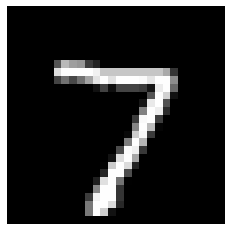

In [ ]:
idx = 0 # try on some index

scores = digit_model(x_test[idx:idx+1])
_, predictions = torch.max(scores, 1)
print("true label:", y_test[idx].item())
print("pred label:", predictions[0].item())

plt.imshow(x_test[idx].numpy().reshape(28, 28), cmap='gray')
plt.axis("off")
plt.show()

### 3.9 Task 11 - Evaluate the model

Now that we have trained the model, we should evaluate it using our test set.  
We will be using the accuracy (whether or not the model predicted the correct label) to measure the model performance.  

Since our model takes in a (n x 784) tensor and returns a (n x 10) tensor of probability scores for each of the 10 classes, we need to convert the probability scores into the actual predictions by taking the index of the maximum probability.  

In [ ]:
def get_accuracy(scores, labels):
    """
    helper function that returns accuracy of model
    PARAMS:
        scores : the raw softmax scores of the network
        label : the ground truth labels
        
    RETURNS:
        accuracy of the model. Return a number in range [0, 1].
        0 means 0% accuracy while 1 means 100% accuracy
    """
    
    # get probability of max_score
    score = torch.max(scores, 1)
    compare = torch.eq(score[1], labels)

    sum = 0
    for elem in compare:
      if elem == True:
        sum += 1
      
    return sum / scores.shape[0]
    

scores = digit_model(x_test) # n x 10 tensor
get_accuracy(scores, y_test)

### End of Project :)